In [3]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [4]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [5]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [6]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [7]:
X_train = X_train.float()
X_test = X_test.float()

In [8]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [9]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

<Figure size 640x480 with 1 Axes>

tensor(5)


In [11]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [35]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [36]:
#torch.cuda.is_available()

In [37]:
#!nvidia-smi

In [38]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

In [39]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [40]:
batch_size = 500

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(200):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print("epoch,", epoch, accuracy)

epoch, 0 tensor(0.9018, device='cuda:0')
epoch, 1 tensor(0.9141, device='cuda:0')
epoch, 2 tensor(0.9218, device='cuda:0')
epoch, 3 tensor(0.9235, device='cuda:0')
epoch, 4 tensor(0.9311, device='cuda:0')
epoch, 5 tensor(0.9255, device='cuda:0')
epoch, 6 tensor(0.9319, device='cuda:0')
epoch, 7 tensor(0.9300, device='cuda:0')
epoch, 8 tensor(0.9365, device='cuda:0')
epoch, 9 tensor(0.9317, device='cuda:0')
epoch, 10 tensor(0.9334, device='cuda:0')
epoch, 11 tensor(0.9370, device='cuda:0')
epoch, 12 tensor(0.9344, device='cuda:0')
epoch, 13 tensor(0.9355, device='cuda:0')
epoch, 14 tensor(0.9368, device='cuda:0')
epoch, 15 tensor(0.9385, device='cuda:0')
epoch, 16 tensor(0.9367, device='cuda:0')
epoch, 17 tensor(0.9364, device='cuda:0')
epoch, 18 tensor(0.9406, device='cuda:0')
epoch, 19 tensor(0.9415, device='cuda:0')
epoch, 20 tensor(0.9411, device='cuda:0')
epoch, 21 tensor(0.9448, device='cuda:0')
epoch, 22 tensor(0.9353, device='cuda:0')
epoch, 23 tensor(0.9427, device='cuda:0')
ep

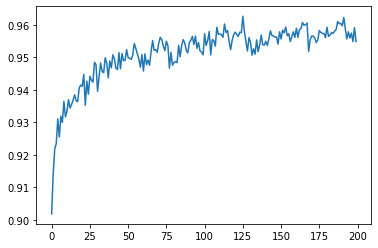

In [42]:
plt.plot(test_accuracy_history)
#plt.plot(test_loss_history);